# Project: Investigate a Dataset - Patient No Shows for Medical Appointments

## Table of Contents:
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction:

The dataset chosen for this report is the "Patient No Shows for Medical Appointments" dataset.  This dataset originated from the country of Brazil, and contains data on over one hundred thousand appointments.  It contains basic demographic data on the patients, as well as whether the patient received an SMS notification for their appointment, and whether the patient received a financial aid scholarship.

This dataset was created to study what factors were useful in predicting if patients would miss their appointments.  The dataset was sourced from [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments).

#### Questions to be explored:

1. What is the appointment no show versus show rate overall?
2. Does gender affect the no show versus show rate?
3. Does patient age factor into appointment no shows versus shows?
4. Does neighborhood factor into no shows versus shows?
5. Does a scholarship factor into no shows versus shows?
6. Does hypertension factor into no shows versus shows?
7. Does diabetes factor into no shows versus shows?
8. Does alcoholism factor into no shows versus shows?
9. Does having a handicap factor into no shows versus shows?
10. Do SMS notifications fact into no shows versus shows?
11. Does the day of the week factor into no shows versus shows?
12. Does the period between the scheduled date and appointment date affect no shows versus shows?

In [104]:
# Import libraries for working with data.

# Date/time manipulation library.
import datetime as dt

# Load the matplotlib visualization library.
import matplotlib.pyplot as plot

# Large array support library, including fast, high-level mathematical functions to
# manipulate the large arrays.
import numpy as np

# Flexible data structure library that enables consistent functionality.
import pandas as pd

# Load the seaborn visualization library (considered a superset of the matplotlib library).
import seaborn as sb

<a id='wrangling'></a>
## Data Wrangling:

In this section data will be loaded, beneficial changes to the data structures will be determined, then the data will be cleaned ready for analysis.

### General Properties:

The data is loaded so that it can be examined to determine what changes are required to clean it for use.

In [105]:
# Load the dataset.
appointments_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

A sample of the data is data is displayed for visual inspection.

In [106]:
# Show a sample of the data.
appointments_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


There are a number of spelling mistakes in the column names which will be corrected.  The column names themselves would benefit from being changed to something more consistent and easier to manipulate - a good option would be [snake case](https://en.wikipedia.org/wiki/Snake_case).

The structure of the dataset will be examined to determine what changes are required to the data types.

In [107]:
# Display the structure of the data.
appointments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The structure check shows that there are 14 columns and 110,527 appointments. *Non-Null Count* shows that there are no missing data, since the count matches the total number of appointments.  A useful data type change would be to change *PatientId* from float64 to int64, so that its appearance is enhanced. *ScheduledDay* and *AppointmentDay* will be changed to timestamps to allow for easier manipulation. *No-show* will be converted to an int64 to make it easier to create graphs.

Five new columns will be derived from the dataset - *scheduled_day_name* (name of the day on which the appointment was scheduled), *appointment_day_name* (name of the day on which the appointment occurred), *elapsed_days* (the number of days between the day on which the appointment was scheduled and the day the appointment occurred), *show* (did someone show?), and *not_show* (did someone not show?).

Refer to the table below for a summary of these changes.

|Original Column Name:|New Column Name:|New Data Type:|
|---|---|---|
|PatientId|patient_id|int64|
|AppointmentID|appointment_id||
|Gender|gender||
|ScheduledDay|scheduled_day|timestamp|
|AppointmentDay|appointment_day|timestamp|
|Age|age||
|Neighbourhood|neighborhood||
|Scholarship|scholarship||
|Hipertension|hypertension||
|Diabetes|diabetes||
|Alcoholism|alcoholism||
|Handcap|handicap||
|SMS_received|sms_received||
|No-show|no_show||
||scheduled_day_name|object|
||appointment_day_name|object|
||elapsed_days|int64|
||show|bool|
||not_show|bool|

Determine if there are duplicates present.

In [108]:
# Determine data duplicates.
number_of_duplicates = sum(appointments_df.duplicated())
print("Duplicated entries: ", number_of_duplicates)

Duplicated entries:  0


No duplicate data exists.

Determine the number of unique patient IDs and appointment IDs to discover if there are any NULLs present.

In [109]:
# Determine the number of unique patient IDs and appointment IDs.
appointments_df.loc[:, ['PatientId', 'AppointmentID']].nunique()

PatientId         62299
AppointmentID    110527
dtype: int64

Based on the count of patient IDs compared with the total number of appointment IDs it can be concluded that some patients had multiple appointments.

Determine if there are any anomalies by summarizing various statistics for the numerical columns.

In [110]:
# Summarize statistics.
appointments_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Possible outliers have been found, since the youngest person (**min**) is -1 and the oldest (**max**) is 115.  A box plot will be displayed to determine if these are outliers.

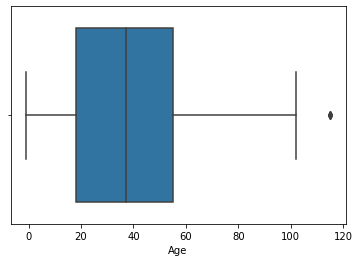

In [111]:
# Box plot of Age.
sb.boxplot(x = "Age", data = appointments_df)

# Display the graph.
plot.show()

Now that we can see that the minimum and maximum ages are outliers, we need to determine how many of these outliers exist.

In [112]:
# Show ages less than 0 or equal to 115.
appointments_df[(appointments_df["Age"] < 0) | (appointments_df["Age"] == 115)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


We can confirm that the dataset contains only 1 entry for an age of -1.  This is likely a typo in the datset and is an outlier.

There are multiple entries for the age of 115.  Knowing that there are patients with multiple appointments we can see from the PatientId that 4 of the 5 appointments for the age of 115 are actually the same patient with multiple appointments.  So, there are 2 patients who fulfill the age of 115.

This dataset was released in 2016, and so in 2021 the ages of the 115 year old patients would be 120.  According to the [list of the verified oldest people](https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people) there are no Brazilians still alive or who died in 2021 (this report was written in 2022) who match these entries (age and location).  This is further evidence that these are outliers.

So, these 3 patients (6 appointments) will be removed from the dataset due to being outliers.

### Data Cleaning:

The column names will be changed and a data sample displayed to show this change.

In [113]:
# Change the column names.
appointments_df.columns = ['patient_id',
                          'appointment_id',
                          'gender',
                          'scheduled_day',
                          'appointment_day',
                          'age',
                          'neighborhood',
                          'scholarship',
                          'hypertension',
                          'diabetes',
                          'alcoholism',
                          'handicap',
                          'sms_received',
                          'no_show']

# Display a sample of the dataset to show the new column names.
appointments_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Convert *patient_id* to an int64 and display a data sample to show the change.

In [114]:
# Convert the patient_id to int64.
appointments_df.patient_id = appointments_df.patient_id.apply('int64')

# Display a sample of the dataset to show the data type conversion.
appointments_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Convert *scheduled_day* and *appointment_day* to timestamps and display a sample of the dataset to show the change.  The time will be removed since time data is not used and this is required for the correct population of *elapsed_day*.

In [115]:
# Convert the scheduled_day to a timestamp and remove the time, leaving the date.
appointments_df['scheduled_day'] = pd.to_datetime(appointments_df['scheduled_day']).dt.date

# Convert the appointment_day to a timestamp and remove the time, leaving the date.
appointments_df['appointment_day'] = pd.to_datetime(appointments_df['appointment_day']).dt.date

# Display a sample of the dataset to show the data type conversion.
appointments_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Change *no_show* to an int64 to enable easier graphing and display a sample of the dataset to show the change.

In [116]:
# Convert the no_show column to int64.
appointments_df['no_show'] = np.where((appointments_df.no_show == "Yes"), 1, 0)

# Display a sample of the dataset to show the data type conversion.
appointments_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


Create *scheduled_day_name* and *appointment_day_name* and display a sample of the dataset to show these new columns.

In [117]:
# Create schedule_day_name column.
appointments_df['scheduled_day_name'] = pd.to_datetime(appointments_df['scheduled_day']).dt.day_name()

# Create appointment_day_name column.
appointments_df['appointment_day_name'] = pd.to_datetime(appointments_df['appointment_day']).dt.day_name()

# Display a sample of the dataset to show the data type conversion.
appointments_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_name,appointment_day_name
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Friday
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,Friday
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,Friday


Create *elapsed_days* and show a sample of the dataset to show the new column.

In [118]:
# Create the elapsed_days column.
appointments_df['elapsed_days'] = pd.to_datetime(appointments_df['appointment_day']) - pd.to_datetime(appointments_df['scheduled_day'])

# Display a sample of the dataset to show the new column.
appointments_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_name,appointment_day_name,elapsed_days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday,0 days
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday,0 days
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Friday,0 days
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,Friday,0 days
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,Friday,0 days


In [119]:
# Create the show column.
show = appointments_df['no_show'] == 0
appointments_df['show'] = show

# Display a sample of the dataset to show the new column.
appointments_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_name,appointment_day_name,elapsed_days,show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday,0 days,True
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday,0 days,True
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Friday,0 days,True
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,Friday,0 days,True
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,Friday,0 days,True


In [120]:
# Create the not_show column.
not_show = appointments_df['no_show'] == 1
appointments_df['not_show'] = not_show

# Display a sample of the dataset to show the new column.
appointments_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_name,appointment_day_name,elapsed_days,show,not_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday,0 days,True,False
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday,0 days,True,False
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Friday,0 days,True,False
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,Friday,0 days,True,False
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,Friday,0 days,True,False


Delete the outliers from the dataset and display the previous box plot to confirm that the outliers have been removed.

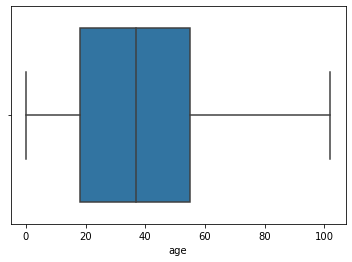

In [121]:
# Delete the outliers.
appointments_df = appointments_df[(appointments_df.age > -1) & (appointments_df.age < 115)]

# Box plot of age.
sb.boxplot(x = "age", data = appointments_df)

# Display the graph.
plot.show()

Confirm that the number of appointments has been reduced by 6.

In [122]:
# Display the data structure, including the number of appointment entries.
appointments_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   patient_id            110521 non-null  int64          
 1   appointment_id        110521 non-null  int64          
 2   gender                110521 non-null  object         
 3   scheduled_day         110521 non-null  object         
 4   appointment_day       110521 non-null  object         
 5   age                   110521 non-null  int64          
 6   neighborhood          110521 non-null  object         
 7   scholarship           110521 non-null  int64          
 8   hypertension          110521 non-null  int64          
 9   diabetes              110521 non-null  int64          
 10  alcoholism            110521 non-null  int64          
 11  handicap              110521 non-null  int64          
 12  sms_received          110521 non-null  int64

As can be seen the number of entries is listed as 110,521 which is 6 less than the original number of 110,527.

<a id='eda'></a>
## Exploratory Data Analysis:

Two data frames will be created that will make analysis and graphing easier:

### What is the appointment no show versus show rate overall?

In [196]:
# Build a new data frame to show total appointments for no-show and show.
show_df = appointments_df.groupby('no_show')['no_show'].agg(['count'])
show_df.reset_index(inplace = True)

# Rename data frame columns.
show_df.columns = ['appointment_status', 'total']

# Make column values more readable.
show_df.iloc[0, 0] = "Show"
show_df.iloc[1, 0] = "No Show"

# Add percentage column.
show_df['percentage'] = [(show_df.iloc[0,1] / (show_df.iloc[0,1] + show_df.iloc[1,1])) * 100,
                        (show_df.iloc[1,1] / (show_df.iloc[0,1] + show_df.iloc[1,1])) * 100]

# Display the new data frame.
show_df.head()

,appointment_status,total,percentage
0,Show,88205,79.808362
1,No Show,22316,20.191638


Overall 20.2% (to two decimal places) were no-shows and 79.8% (to two decimal places) were shows.  Here is a visual distribution of the appointment status:

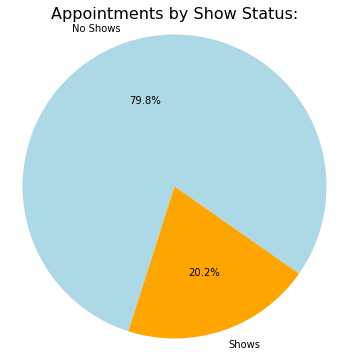

In [124]:
# Create a pie chart to show overall status.

# Set up parameters for chart.
labels = ['No Shows', 'Shows']
sizes = [show_df.iloc[0,2], show_df.iloc[1,2]]
colors = ['lightblue', 'orange']

# Draw pie chart and set options.
plot.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=325)
plot.title('Appointments by Show Status:', fontsize=16)
plot.axis('equal')
figure = plot.gcf()
figure.set_size_inches(6, 6)

# Display pie chart.
plot.show()

### Does gender affect the no show versus show rate?

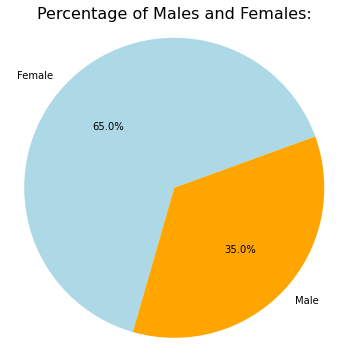

In [146]:
# Create a pie chart to show the percentage of males and females.

# Build a new data frame to hold the percentage of males and females.
all_genders = appointments_df['gender'].value_counts()

# Set parameters.
labels = ['Female', 'Male']
colors = ['lightblue', 'orange']
explode = (0, 0.1)

# Create the pie chart.
plot.pie(all_genders, labels=labels, colors=colors, autopct='%1.1f%%', startangle=20)

# Set options.
plot.title('Percentage of Males and Females:', fontsize=16)
plot.axis('equal')
figure = plot.gcf()
figure.set_size_inches(6, 6)

# Display pie chart.
plot.show()

Here we see that there are more female appointments than male appointments.

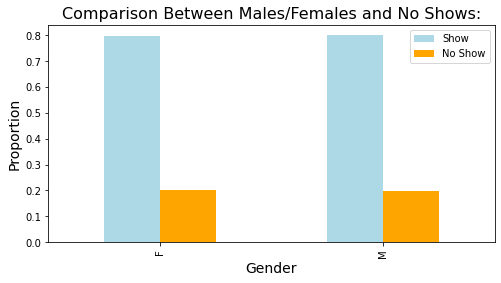

In [183]:
# See relation between males/females and no shows.
appointments_df.groupby('gender')[['show', 'not_show']].mean().plot(kind='bar',
                                                    figsize=(8,4),
                                                    color=['lightblue','orange'])

# Set options.
plot.xlabel('Gender', fontsize=14)
plot.ylabel('Proportion', fontsize=14)
plot.title('Comparison Between Males/Females and No Shows:',
          fontsize=16)
plot.legend(['Show', 'No Show'])

# Display the chart.
plot.show()

Here we see that there is no appreciable difference between the shows and no shows by gender.

### Does patient age factor into appointment no shows versus shows?

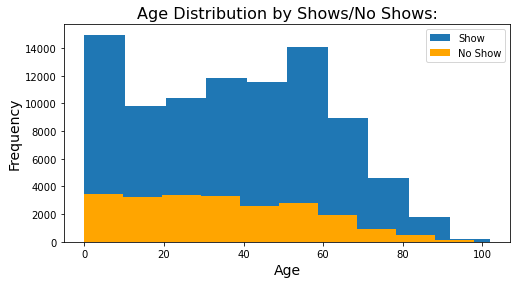

In [199]:
# See relation between patient ages and no shows.

# Calculate age data.
no_shows_age = no_shows['age']
shows_age = shows['age']



# Calculate who showed and who did not.
turned_up = (appointments_df.no_show == 0)
not_turned_up = (appointments_df.no_show == 1)

# Plot histagrams.
appointments_df[turned_up].age.plot.hist()
appointments_df[not_turned_up].age.plot.hist(figsize=(8,4), color='orange')

# Set options.
plot.title('Age Distribution by Shows/No Shows:', fontsize=16)
plot.xlabel('Age', fontsize=14)
plot.ylabel('Frequency', fontsize=14)
plot.legend(['Show', 'No Show'])

# Display histagrams.
plot.show()

Here it can be seen that the most appointments are for younger children.

### Does neighborhood factor into no shows versus shows?

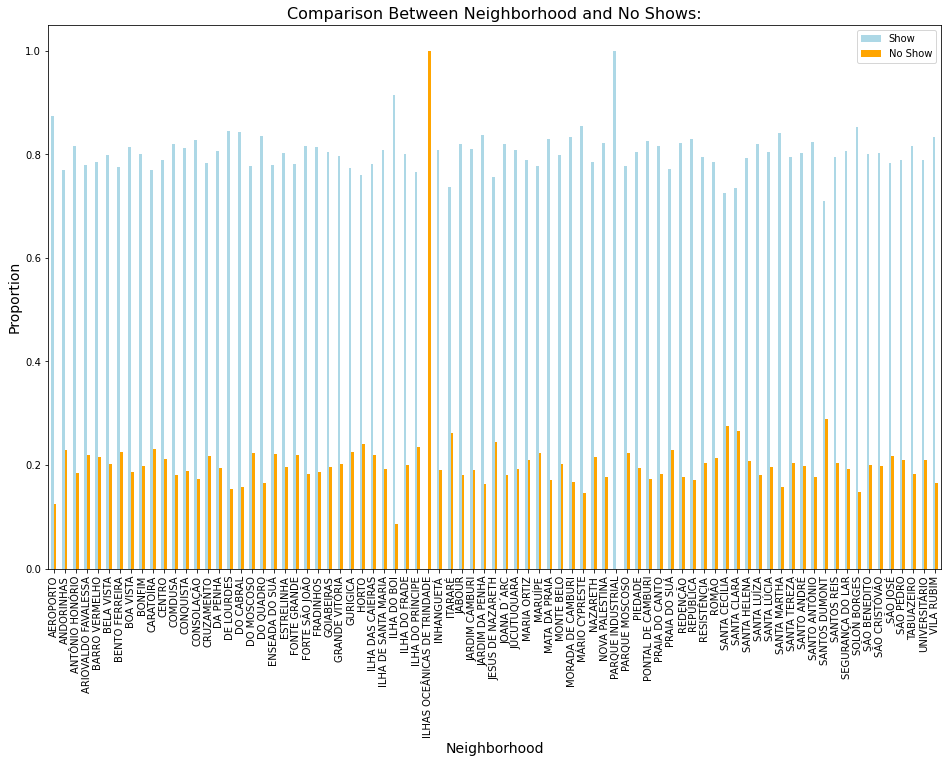

In [191]:
# See relation between neighborhood and no shows.
appointments_df.groupby('neighborhood')[['show', 'not_show']].mean().plot(kind='bar',
                                                    figsize=(16,10),
                                                    color=['lightblue','orange'])

# Set options.
plot.xlabel('Neighborhood', fontsize=14)
plot.ylabel('Proportion', fontsize=14)
plot.title('Comparison Between Neighborhood and No Shows:',
          fontsize=16)
plot.legend(['Show', 'No Show'])

# Display the chart.
plot.show()

The neighborhood location of a patient does not seem to be a major factor.

### Does a scholarship factor into no shows versus shows?

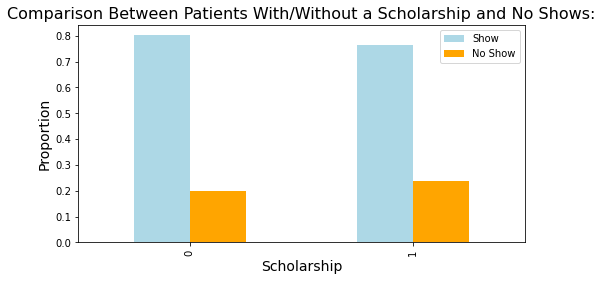

In [166]:
# See relation between patients with scholarships and no shows.
appointments_df.groupby('scholarship')[['show', 'not_show']].mean().plot(kind='bar',
                                                                       figsize=(8,4),
                                                                       color=['lightblue',
                                                                              'orange'])

# Set options.
plot.xlabel('Scholarship', fontsize=14)
plot.ylabel('Proportion', fontsize=14)
plot.title('Comparison Between Patients With/Without a Scholarship and No Shows:',
          fontsize=16)
plot.legend(['Show', 'No Show'])

# Display the chart.
plot.show()

Patients with scholarships appeared to have a higher percentage of not attending appointments. 

### Does hypertension factor into no shows versus shows?

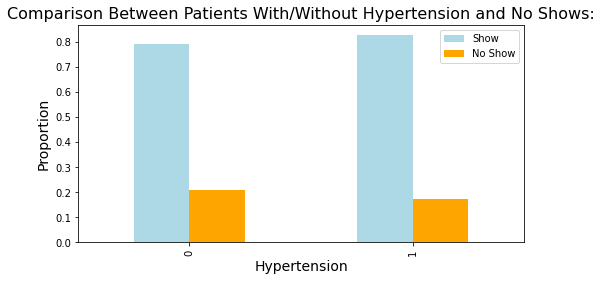

In [162]:
# See relation between patients with/without hypertension and no shows.
appointments_df.groupby('hypertension')[['show', 'not_show']].mean().plot(kind='bar',
                                                    figsize=(8,4),
                                                    color=['lightblue','orange'])

# Set options.
plot.xlabel('Hypertension', fontsize=14)
plot.ylabel('Proportion', fontsize=14)
plot.title('Comparison Between Patients With/Without Hypertension and No Shows:',
          fontsize=16)
plot.legend(['Show', 'No Show'])

# Display the chart.
plot.show()

More patients show up with hypertension than those without.

### Does diabetes factor into no shows versus shows?

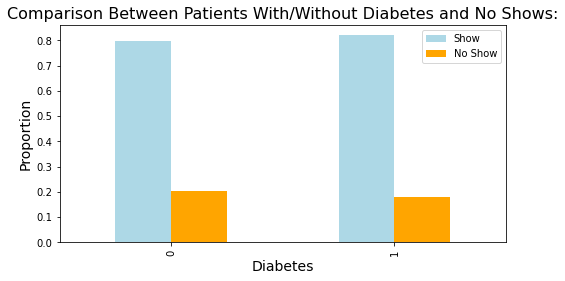

In [163]:
# See relation between patients with/without diabetes and no shows.
appointments_df.groupby('diabetes')[['show', 'not_show']].mean().plot(kind='bar',
                                                    figsize=(8,4),
                                                    color=['lightblue','orange'])

# Set options.
plot.xlabel('Diabetes', fontsize=14)
plot.ylabel('Proportion', fontsize=14)
plot.title('Comparison Between Patients With/Without Diabetes and No Shows:',
          fontsize=16)
plot.legend(['Show', 'No Show'])

# Display the chart.
plot.show()

More patients show up with diabetes than without.

### Does alcoholism factor into no shows versus shows?

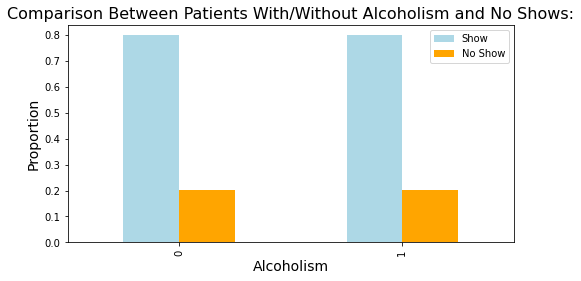

In [164]:
# See relation between patients with/without alcoholism and no shows.
appointments_df.groupby('alcoholism')[['show', 'not_show']].mean().plot(kind='bar',
                                                    figsize=(8,4),
                                                    color=['lightblue','orange'])

# Set options.
plot.xlabel('Alcoholism', fontsize=14)
plot.ylabel('Proportion', fontsize=14)
plot.title('Comparison Between Patients With/Without Alcoholism and No Shows:',
          fontsize=16)
plot.legend(['Show', 'No Show'])

# Display the chart.
plot.show()

There is virtually no difference between the shows and no shows for alcoholics and non-alcoholics.

### Does having a handicap factor into no shows versus shows?

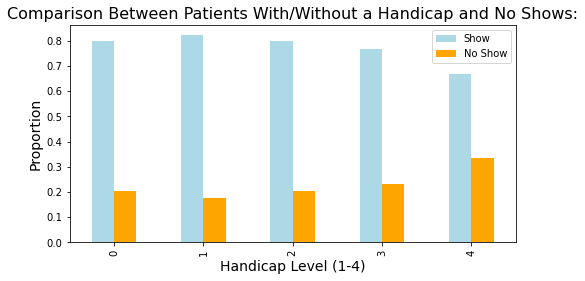

In [201]:
# See relation between patients with/without a handicap and no shows.
appointments_df.groupby('handicap')[['show', 'not_show']].mean().plot(kind='bar',
                                                    figsize=(8,4),
                                                    color=['lightblue','orange'])

# Set options.
plot.xlabel('Handicap Level (1-4)', fontsize=14)
plot.ylabel('Proportion', fontsize=14)
plot.title('Comparison Between Patients With/Without a Handicap and No Shows:',
          fontsize=16)
plot.legend(['Show', 'No Show'])

# Display the chart.
plot.show()

There are four levels of being handicapped.  Level 0 is non-handicapped. The more handicapped someone is, the less they are likely to show up.

### Do SMS notifications factor into no shows versus shows?

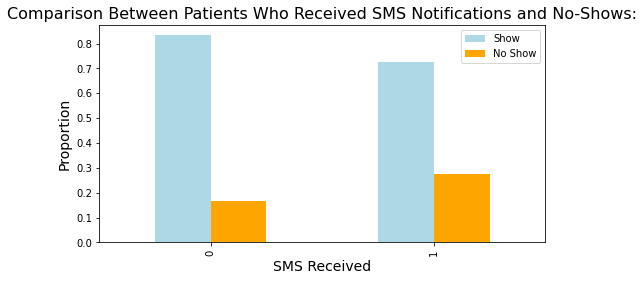

In [158]:
# Relation between patients who received SMS notifications and no shows.
appointments_df.groupby('sms_received')[['show', 'not_show']].mean().plot(kind='bar',
                                                                       figsize=(8,4),
                                                                       color=['lightblue',
                                                                              'orange'])

# Set options.
plot.xlabel('SMS Received', fontsize=14)
plot.ylabel('Proportion', fontsize=14)
plot.title('Comparison Between Patients Who Received SMS Notifications and No Shows:',
          fontsize=16)
plot.legend(['Show', 'No Show'])

# Display the chart.
plot.show()

The percentage of no shows is much higher when SMS notifications were received.

### Does the day of the week factor into no shows versus shows?

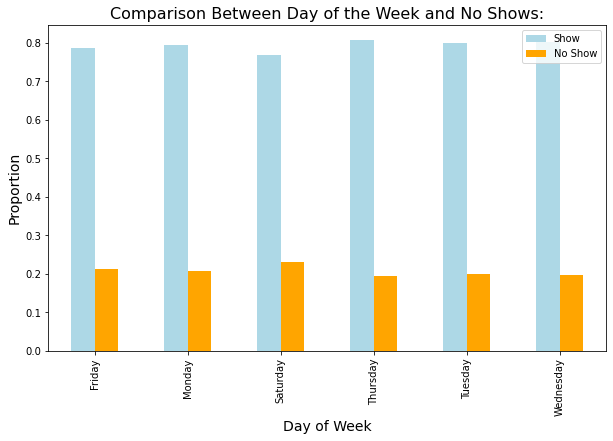

In [195]:
# See relation between days of the week and no shows.
appointments_df.groupby('appointment_day_name')[['show', 'not_show']].mean().plot(kind='bar',
                                                    figsize=(10,6),
                                                    color=['lightblue','orange'])

# Set options.
plot.xlabel('Day of Week', fontsize=14)
plot.ylabel('Proportion', fontsize=14)
plot.title('Comparison Between Day of the Week and No Shows:',
          fontsize=16)
plot.legend(['Show', 'No Show'])

# Display the chart.
plot.show()

Appointment no shows occurred the most on Saturdays and the least on Thursdays.

### Does the period between the scheduled date and appointment date affect no-shows versus shows?

In [95]:
# Create a data frame of all shows.
shows = appointments_df.query('no_show == "0"')
shows_days = shows['elapsed_days'].mean()
period_shows = shows_days / np.timedelta64(1, 'D')

# Display sample data.
shows.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_name,appointment_day_name,elapsed_days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday,0 days
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday,0 days
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Friday,0 days
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,Friday,0 days
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,Friday,0 days


In [96]:
# Create a data frame of all no-shows.
no_shows = appointments_df.query('no_show == "1"')
no_shows_days = no_shows['elapsed_days'].mean()
period_no_shows = no_shows_days / np.timedelta64(1, 'D')

# Display sample data.
no_shows.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_name,appointment_day_name,elapsed_days
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,Wednesday,Friday,2 days
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,Wednesday,Friday,2 days
11,7542951368435,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,1,Tuesday,Friday,3 days
17,14794966191172,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,1,Thursday,Friday,1 days
20,622257462899397,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,1,Wednesday,Friday,2 days


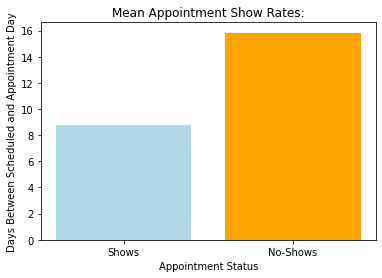

In [97]:
# Create a bar chart to compare periods between scheduled date and appointment date.

# Set parameters.
locations = [1, 2]
heights = [period_shows, period_no_shows]
labels = ['Shows', 'No-Shows']

# Create bar chart.
plot.bar(locations, heights, tick_label=labels, color=['lightblue', 'orange'])

# Set options.
plot.title('Mean Appointment Show Rates:')
plot.ylabel('Days Between Scheduled and Appointment Day')
plot.xlabel('Appointment Status')

# Display the bar chart.
plot.show()

This shows the mean period between the scheduled day and appointment day.  It looks like the larger the gap between the scheduled day and appointment day, the more no shows we see.

<a id='conclusions'></a>
## Conclusions:

More robust analysis in the future could be done on the following conclusions that impact whether a patient shows up to their appointment:

- Overall, 79.8% of all patients showed up to their appointment, while 20.2% did not.

- Although, most of the patients are female, both sexes keep their appointments equally well.

- There was a distinct change in no shows versus shows around 30 - 40 years old.

- Neighborhood does not have a significant affect on patients keeping their appointments.

- Patients with scholarships appear to miss their appointments more often than those without.  This was unexpected and would be a future investigation.

- Patients with hypertension keep their appointments more than people without hypertension.

- Diabetics will show up for appointments more frequently than non-diabetics.

- Alcoholics will show up to their appointments almost as frequently as non-alcoholics.

- A handicapped patient is less likely to keep their appointment the more handicapped they are.

- Patients who were sent SMS notifications were less likely to keep their appointments than patients who did not receive SMS notifications.  This was surprising and could be investigated and would be a future investigation.

- Appointment no shows occurred the most on Saturdays and the least on Thursdays.

- The greater the number of days between the scheduled day and the appointment day the more likely a patient would not show.

**Limitations:**

The dataset used only covered a six month period.  Datasets with longer timeframes would likely provide greater insight, particulary regarding how seasonality and holidays impacted show rates.

Using external data sources to see how traffic, weather, or geographic data could allow better understanding of no-show rates.